##### There are two products (pencils and pens), which are produced in two cities (Detroit and Denver) and sent to three other cities (Boston, New York and Seattle), and must meet the quantity of goods required by these three cities. During the transportation of the item, the transportation capacity of each route shall not exceed







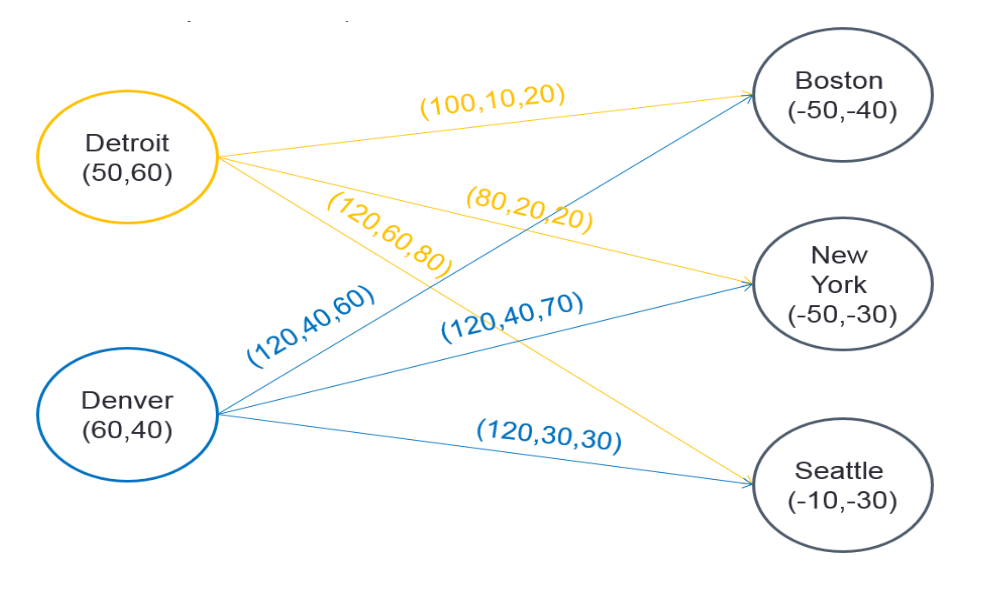

In [1]:
import gurobipy as gp
from gurobipy import GRB

In [2]:
# Base data
commodities = ['Pencils', 'Pens']
nodes = ['Detroit', 'Denver', 'Boston', 'New York', 'Seattle']

In [3]:
arcs, capacity = gp.multidict({
    ('Detroit', 'Boston'):   100,
    ('Detroit', 'New York'):  80,
    ('Detroit', 'Seattle'):  120,
    ('Denver',  'Boston'):   120,
    ('Denver',  'New York'): 120,
    ('Denver',  'Seattle'):  120})

In [4]:
# Cost for triplets commodity-source-destination
cost = {
    ('Pencils', 'Detroit', 'Boston'):   10,
    ('Pencils', 'Detroit', 'New York'): 20,
    ('Pencils', 'Detroit', 'Seattle'):  60,
    ('Pencils', 'Denver',  'Boston'):   40,
    ('Pencils', 'Denver',  'New York'): 40,
    ('Pencils', 'Denver',  'Seattle'):  30,
    ('Pens',    'Detroit', 'Boston'):   20,
    ('Pens',    'Detroit', 'New York'): 20,
    ('Pens',    'Detroit', 'Seattle'):  80,
    ('Pens',    'Denver',  'Boston'):   60,
    ('Pens',    'Denver',  'New York'): 70,
    ('Pens',    'Denver',  'Seattle'):  30}

In [5]:
# Supply (> 0) and demand (< 0) for pairs of commodity-city
inflow = {
    ('Pencils', 'Detroit'):   50,
    ('Pencils', 'Denver'):    60,
    ('Pencils', 'Boston'):   -50,
    ('Pencils', 'New York'): -50,
    ('Pencils', 'Seattle'):  -10,
    ('Pens',    'Detroit'):   60,
    ('Pens',    'Denver'):    40,
    ('Pens',    'Boston'):   -40,
    ('Pens',    'New York'): -30,
    ('Pens',    'Seattle'):  -30}


In [6]:
m= gp.Model("Netflow")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-10


In [7]:
flow=m.addVars(commodities,arcs, obj=cost, name="flow")

In [8]:
# Arc-capacity constraints
m.addConstrs(
    (flow.sum('*', i, j) <= capacity[i, j] for i, j in arcs), "cap")

{('Detroit', 'Boston'): <gurobi.Constr *Awaiting Model Update*>,
 ('Detroit', 'New York'): <gurobi.Constr *Awaiting Model Update*>,
 ('Detroit', 'Seattle'): <gurobi.Constr *Awaiting Model Update*>,
 ('Denver', 'Boston'): <gurobi.Constr *Awaiting Model Update*>,
 ('Denver', 'New York'): <gurobi.Constr *Awaiting Model Update*>,
 ('Denver', 'Seattle'): <gurobi.Constr *Awaiting Model Update*>}

In [9]:
# Flow-conservation constraints
m.addConstrs(
    (flow.sum(h, '*', j) + inflow[h, j] == flow.sum(h, j, '*')
        for h in commodities for j in nodes), "node")

{('Pencils', 'Detroit'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pencils', 'Denver'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pencils', 'Boston'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pencils', 'New York'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pencils', 'Seattle'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pens', 'Detroit'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pens', 'Denver'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pens', 'Boston'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pens', 'New York'): <gurobi.Constr *Awaiting Model Update*>,
 ('Pens', 'Seattle'): <gurobi.Constr *Awaiting Model Update*>}

In [10]:
# Compute optimal solution
m.optimize()

# Print solution
if m.Status == GRB.OPTIMAL:
    solution = m.getAttr('X', flow)
    for h in commodities:
        print('\nOptimal flows for %s:' % h)
        for i, j in arcs:
            if solution[h, i, j] > 0:
                print('%s -> %s: %g' % (i, j, solution[h, i, j]))

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 16 rows, 12 columns and 36 nonzeros
Model fingerprint: 0xc43e5943
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]
Presolve removed 16 rows and 12 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5000000e+03   0.000000e+00   2.000000e+01      0s
Extra simplex iterations after uncrush: 1
       1    5.5000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.06 seconds (0.00 work units)
Optimal objective  5.500000000e+03

Optimal flows for Pencils:
Detroit -> Boston: 50
Denver -> New York: 50
Denver -> Seattle: 10

Optimal flows for Pens:
Detroit -> Boston: 30
Detroit -> New York: 30
Denver -> Boston: 10
Denver